In [100]:
import pip
# pip.main(['install', '{insert_pckg_here}'])
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Training/Testing Data:

In [101]:
train_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/train.csv'
test_url = 'https://raw.githubusercontent.com/mturner49/pylovers-final-project/dev/data/test.csv'

#training_set = pd.read_csv(train_url, low_memory=False, error_bad_lines=False, index_col='Id')
#testing_set = pd.read_csv(test_url, low_memory=False, error_bad_lines=False, index_col='Id')
train_df = pd.read_csv(train_url, low_memory=False, error_bad_lines=False, index_col='Id')
test_df = pd.read_csv(test_url, low_memory=False, error_bad_lines=False, index_col='Id')

#train_df = pd.DataFrame(training_set)
#test_df = pd.DataFrame(testing_set)

train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprocessing:

In [102]:
#print(train_df.Neighborhood)
# Prints correctly

In [103]:
train_df_dummies = pd.get_dummies(data=train_df , columns=['MSZoning','Street', 'Alley', 'LotShape', 'LandContour',
                                                   'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                                                   'BldgType', 'HouseStyle'])
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [104]:
#print(train_df_dummy.Neighborhood)
#AttributeError: 'DataFrame' object has no attribute 'Neighborhood'

In [105]:
# creating a generic dictionary to hold numercial values to represent categorical values
# for quality related columns (ExterQual, BsmtQual)
quality_ratings = {
 'NA':0,
 'Po':1, 
 'Fa':2, 
 'TA':3, 
 'Gd':4, 
 'Ex':5
}

In [106]:
#print(train_df.ExterQual)

#df = train_df.groupby('ExterQual').size()
#print (df)

# Converting category labels to numerical values for ExterQual column
train_df['ExterQual_Num'] = train_df.ExterQual.map(quality_ratings)

#print(train_df.ExterQual_Num)

In [107]:
#print(train_df.BsmtQual)

#df = train_df.groupby('ExterQuall').size()
#print (df)

# Converting category labels to numerical values for BsmtQual column
train_df['BsmtQual_Num'] = train_df.BsmtQual.map(quality_ratings)

#print(train_df.BsmtQual_Num)

In [108]:
#print(train_df.HeatingQC)

#df = train_df.groupby('HeatingQC').size()
#print (df)

# Converting category labels to numerical values for HeatingQC column
train_df['HeatingQC_Num'] = train_df.HeatingQC.map(quality_ratings)

#print(train_df.HeatingQC_Num)

In [109]:
#print(train_df.KitchenQual)

#df = train_df.groupby('KitchenQual').size()
#print (df)

# Converting category labels to numerical values for KitchenQual column
train_df['KitchenQual_Num'] = train_df.KitchenQual.map(quality_ratings)

#print(train_df.KitchenQual_Num)

In [110]:
#print(train_df.FireplaceQu)

#df = train_df.groupby('FireplaceQu').size()
#print (df)

# Converting category labels to numerical values for FireplaceQu column
train_df['FireplaceQu_Num'] = train_df.FireplaceQu.map(quality_ratings)

#print(train_df.FireplaceQu_Num)

In [111]:
#print(train_df.GarageQual)

#df = train_df.groupby('GarageQual').size()
#print (df)

# Converting category labels to numerical values for GarageQual column
train_df['GarageQual_Num'] = train_df.GarageQual.map(quality_ratings)

#print(train_df.GarageQual_Num)

In [112]:
#print(train_df.PoolQC)

#df = train_df.groupby('PoolQC').size()
#print (df)

# Converting category labels to numerical values for PoolQC column
train_df['PoolQC_Num'] = train_df.PoolQC.map(quality_ratings)
#print(train_df.PoolQC_Num)

In [114]:
# NA is a valid value and is some cases not equivalent to NaN and should not be converted to 0
# replace null values in df w/ values that had most counts for each column
train_df = train_df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' \
                          else x.fillna(train_df.columns.value_counts().idxmax()))
test_df = test_df.apply(lambda x: x.fillna(0) if x.dtype.kind in 'biufc' \
                          else x.fillna(train_df.columns.value_counts().idxmax()))
# combining the training and test dfs
# dfs = [train_df, test_df]
# df = pd.concat(dfs)

# df.head()

In [115]:
# encode object (categorical) columns in df
enc_df = train_df.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)

# add encoded columns back into original train df
train_df[enc_df.columns] = enc_df
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,SaleCondition,SalePrice,ExterQual_Num,BsmtQual_Num,HeatingQC_Num,KitchenQual_Num,FireplaceQu_Num,GarageQual_Num,PoolQC_Num,SaleCondition_Num
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,2,3,3,0,4,...,4,208500,4,4.0,5,4,0.0,3.0,0.0,5
2,20,3,80.0,9600,1,2,3,3,0,2,...,4,181500,3,4.0,5,3,3.0,3.0,0.0,5
3,60,3,68.0,11250,1,2,0,3,0,4,...,4,223500,4,4.0,5,4,3.0,3.0,0.0,5
4,70,3,60.0,9550,1,2,0,3,0,0,...,0,140000,3,3.0,4,4,4.0,3.0,0.0,1
5,60,3,84.0,14260,1,2,0,3,0,2,...,4,250000,4,4.0,5,4,3.0,3.0,0.0,5


## Data Exploration:

In [116]:
# looking at correlation of numeric features to SalePrice column. 
# this will suggest which columns have a greater relationship with the SalePrice column 
corr = train_df.corr().abs().unstack().sort_values(ascending=False)['SalePrice']
corr = corr.iloc[1:]
corr.head(40)

OverallQual        0.790982
GrLivArea          0.708624
ExterQual_Num      0.682639
KitchenQual_Num    0.659600
GarageCars         0.640409
ExterQual          0.636884
GarageArea         0.623431
TotalBsmtSF        0.613581
1stFlrSF           0.605852
BsmtQual           0.593734
KitchenQual        0.589189
BsmtQual_Num       0.585207
FullBath           0.560664
TotRmsAbvGrd       0.533723
YearBuilt          0.522897
FireplaceQu_Num    0.520438
YearRemodAdd       0.507101
MasVnrArea         0.472614
Fireplaces         0.466929
HeatingQC_Num      0.427649
GarageFinish       0.425684
GarageType         0.415283
HeatingQC          0.400178
BsmtFinSF1         0.386420
Foundation         0.382479
WoodDeckSF         0.324413
2ndFlrSF           0.319334
OpenPorchSF        0.315856
BsmtExposure       0.309043
HalfBath           0.284108
FireplaceQu        0.275027
GarageQual_Num     0.273839
LotArea            0.263843
GarageYrBlt        0.261366
LotShape           0.255580
CentralAir         0

Text(0.5, 1.0, 'Price vs Overall Quality')

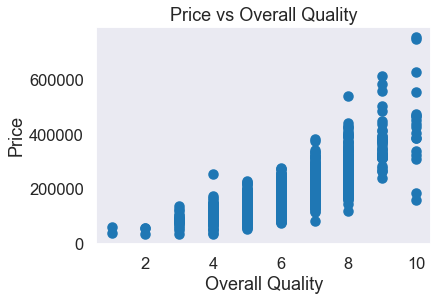

In [117]:
# show how sales price varies with overall quality
plt.scatter(train_df.OverallQual, train_df.SalePrice)
plt.xlabel("Overall Quality")
plt.ylabel('Price')
plt.title("Price vs Overall Quality")

Text(0.5, 1.0, 'Price vs Garage Size')

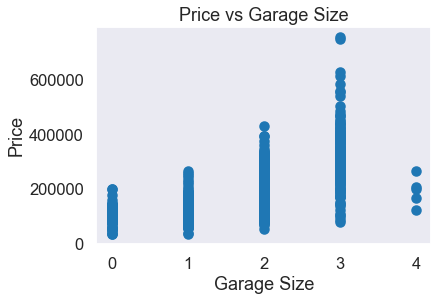

In [118]:
# show how sales price varies with garage size in car capacity
plt.scatter(train_df.GarageCars, train_df.SalePrice)
plt.xlabel("Garage Size")
plt.ylabel('Price')
plt.title("Price vs Garage Size")

Text(0.5, 1.0, 'Price vs GrLivArea')

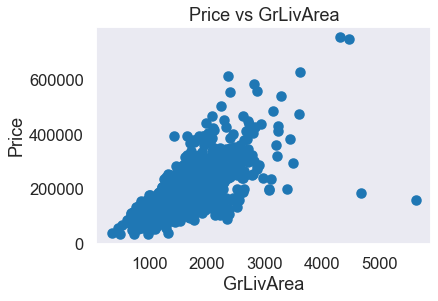

In [119]:
plt.scatter(train_df.GrLivArea, train_df.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel('Price')
plt.title("Price vs GrLivArea")

## Data Visualization (CAN BE DELETED):

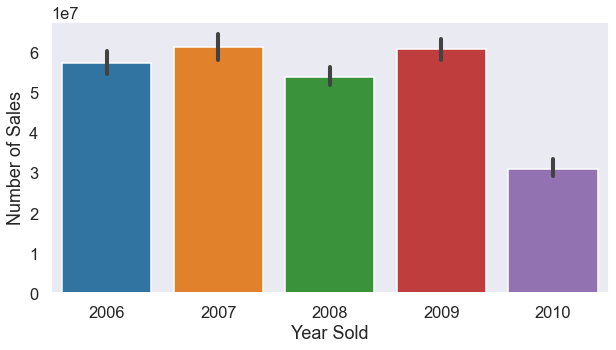

In [120]:
#Count the number of houses sold in a year
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc='count')
#print(year_sold_pivot)

# Plotting the sum of sales per year
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=sum)
plt.xlabel('Year Sold')
plt.ylabel('Number of Sales')
plt.show()

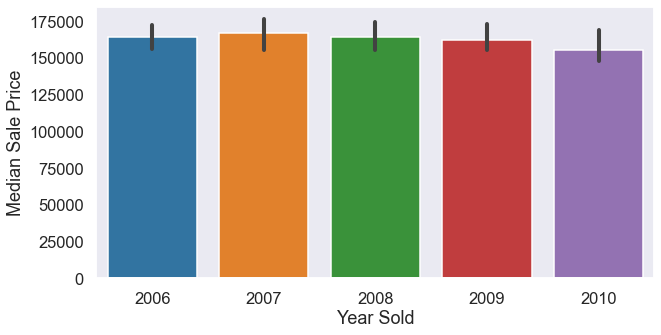

In [121]:
# Plotting the median sale price for each year

#Checking the median price
#year_sold_pivot = train_df.pivot_table(index='YrSold', values='SalePrice', aggfunc=np.median)
#print(year_sold_pivot)

sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']], estimator=np.median)
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

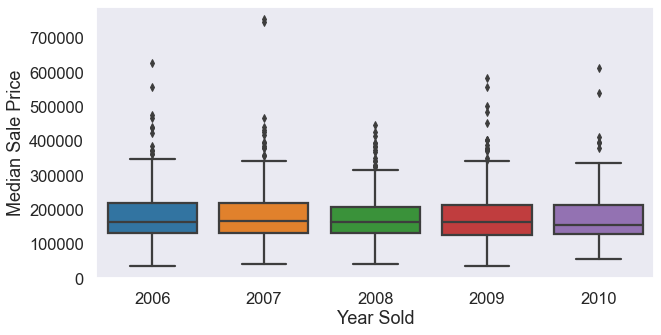

In [122]:
#Displaying the median price for each year using box plot.  
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.boxplot(x='YrSold', y='SalePrice', data=train_df[['SalePrice', 'YrSold']])
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.show()

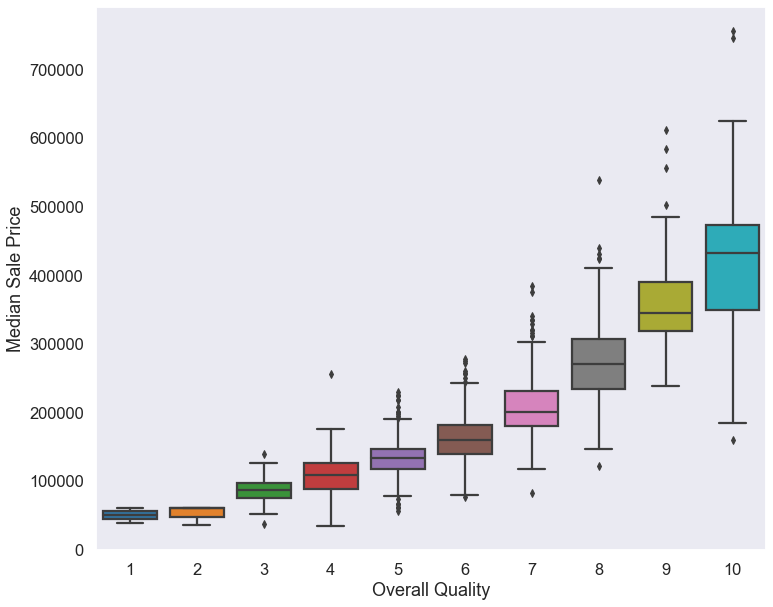

In [123]:
# Displaying the median price based on overall quality of the house using box plot.
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(12,10))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df[['SalePrice', 'OverallQual']])
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

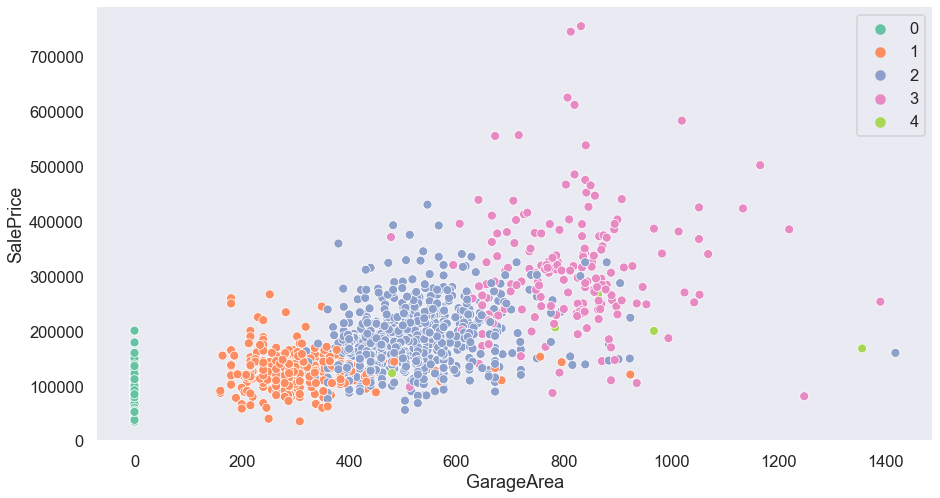

In [124]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot GarageArea vs sale price of house considering the number of cars that can
# fit in the garage
sns.scatterplot(x='GarageArea', y='SalePrice', hue=train_df.GarageCars.tolist(),
            palette='Set2', data=train_df[['SalePrice', 'GarageArea','GarageCars']])
plt.show()

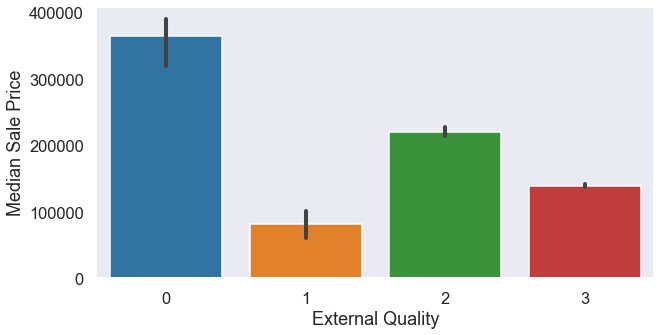

In [125]:
# Plotting the median sale price based on external quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='ExterQual', y='SalePrice', data=train_df[['SalePrice', 'ExterQual']], estimator=np.median)
plt.xlabel('External Quality')
plt.ylabel('Median Sale Price')
plt.show()

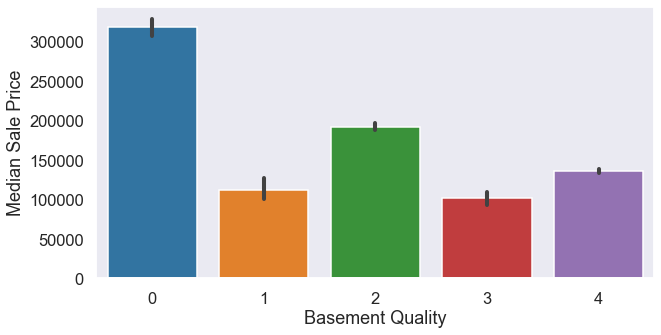

In [126]:
# Plotting the median sale price based on basement quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='BsmtQual', y='SalePrice', data=train_df[['SalePrice', 'BsmtQual']], estimator=np.median)
plt.xlabel('Basement Quality')
plt.ylabel('Median Sale Price')
plt.show()

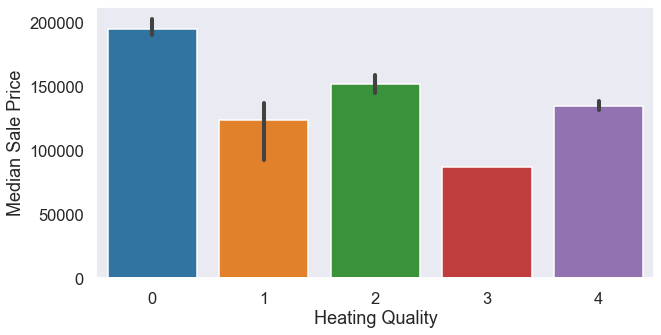

In [127]:
# Plotting the median sale price based on heating and air conditioning quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='HeatingQC', y='SalePrice', data=train_df[['SalePrice', 'HeatingQC']], estimator=np.median)
plt.xlabel('Heating Quality')
plt.ylabel('Median Sale Price')
plt.show()

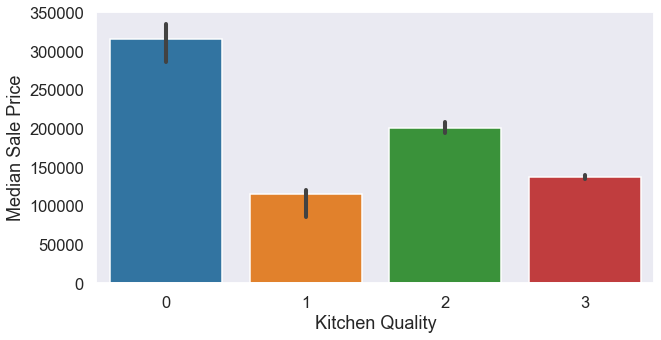

In [128]:
# Plotting the median sale price based on kitchen quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='KitchenQual', y='SalePrice', data=train_df[['SalePrice', 'KitchenQual']], estimator=np.median)
plt.xlabel('Kitchen Quality')
plt.ylabel('Median Sale Price')
plt.show()

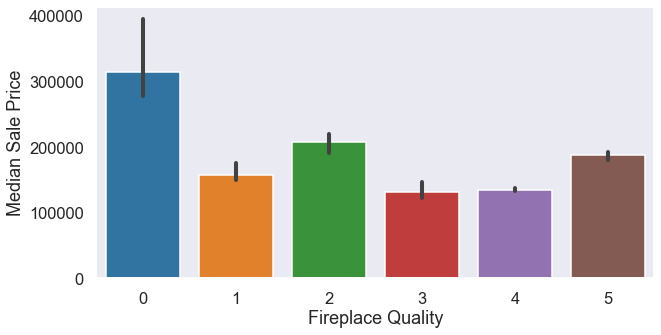

In [129]:
# Plotting the median sale price based on fireplace quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='FireplaceQu', y='SalePrice', data=train_df[['SalePrice', 'FireplaceQu']], estimator=np.median)
plt.xlabel('Fireplace Quality')
plt.ylabel('Median Sale Price')
plt.show()

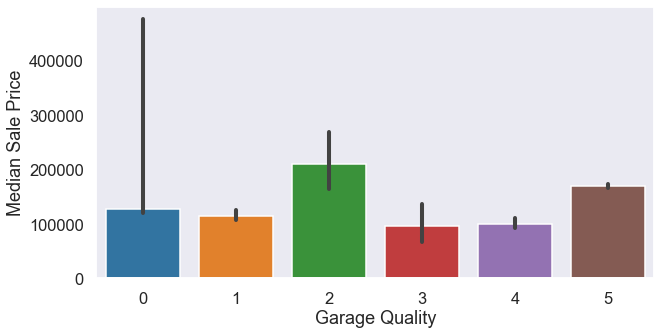

In [130]:
# Plotting the median sale price based on garage quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='GarageQual', y='SalePrice', data=train_df[['SalePrice', 'GarageQual']], estimator=np.median)
plt.xlabel('Garage Quality')
plt.ylabel('Median Sale Price')
plt.show()

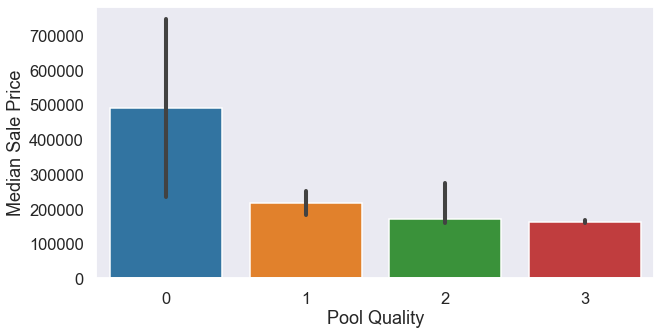

In [131]:
# Plotting the median sale price based on pool quality
sns.set_context('talk', font_scale=1) 
plt.figure(figsize=(10,5))
sns.barplot(x='PoolQC', y='SalePrice', data=train_df[['SalePrice', 'PoolQC']], estimator=np.median)
plt.xlabel('Pool Quality')
plt.ylabel('Median Sale Price')
plt.show()

## Feature Engineering:

In [184]:
# sum of quality points.
train_df['SumQuality'] = train_df.ExterQual_Num + train_df.BsmtQual_Num + train_df.HeatingQC_Num + train_df.KitchenQual_Num + train_df.GarageQual_Num + train_df.FireplaceQu_Num + train_df.GarageQual_Num
+ train_df.PoolQC_Num 
            
#print(train_df['SumQuality'])

# sum of quality points, removing less correlated features (< 0.5).
train_df['SumMIQ'] = train_df.ExterQual_Num + train_df.BsmtQual_Num + train_df.KitchenQual_Num + train_df.FireplaceQu_Num + train_df.GarageQual_Num

In [133]:
# Garage area per car
train_df['GarageAreaPerCar'] = train_df.GarageArea / train_df.GarageCars 
#print(train_df['GarageAreaPerCar'])

#Age of garage
train_df['GarageAge'] = train_df.YrSold - train_df.GarageYrBlt


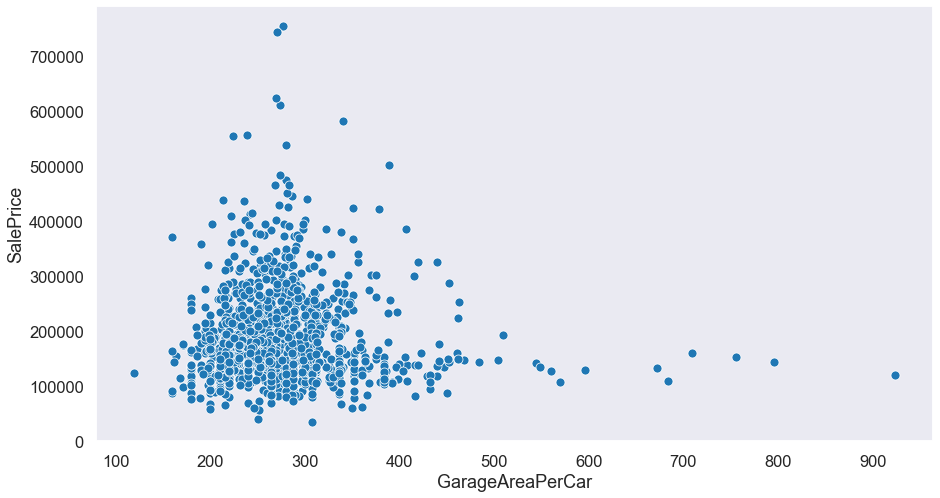

In [134]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot garage area per car vs sale price of house
sns.scatterplot(x='GarageAreaPerCar', y='SalePrice',
            palette='Set2', data=train_df[['SalePrice', 'GarageAreaPerCar']])
plt.show()

In [172]:
# summing developed areas (indoor and outdoor)
train_df['IndoorArea'] = train_df.GrLivArea + train_df.TotalBsmtSF + train_df.GarageArea

train_df['OutdoorArea'] = train_df.WoodDeckSF + train_df.OpenPorchSF + train_df.EnclosedPorch + train_df['3SsnPorch'] + train_df.ScreenPorch + train_df.MasVnrArea + train_df.PoolArea

train_df['DevelopedArea'] = train_df.IndoorArea + train_df.OutdoorArea

train_df['InsideOutsideRatio'] = train_df.IndoorArea / train_df.OutdoorArea

train_df['FloorRatio'] = train_df['2ndFlrSF'] / train_df['1stFlrSF']


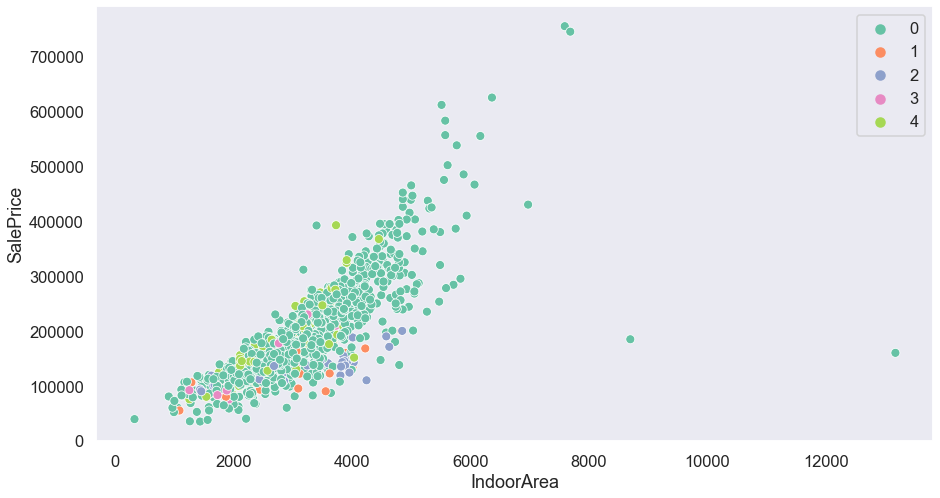

In [158]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total indoor area vs sale price of house considering the building type
sns.scatterplot(x='IndoorArea', y='SalePrice', hue=train_df.BldgType.tolist(),
            palette='Set2', data=train_df[['SalePrice', 'IndoorArea','BldgType']])
plt.show()

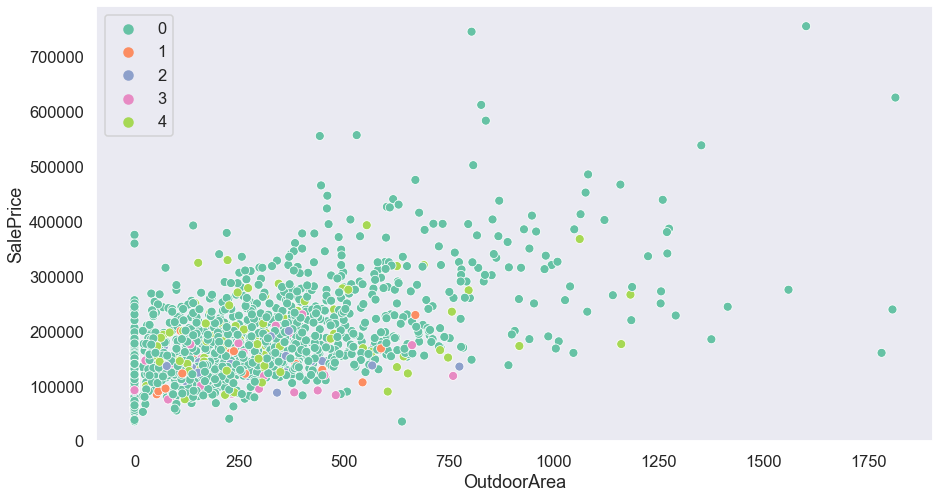

In [149]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total outdoor area vs sale price of house considering the building type
sns.scatterplot(x='OutdoorArea', y='SalePrice', hue=train_df.BldgType.tolist(),
            palette='Set2', data=train_df[['SalePrice', 'OutdoorArea','BldgType']])
plt.show()

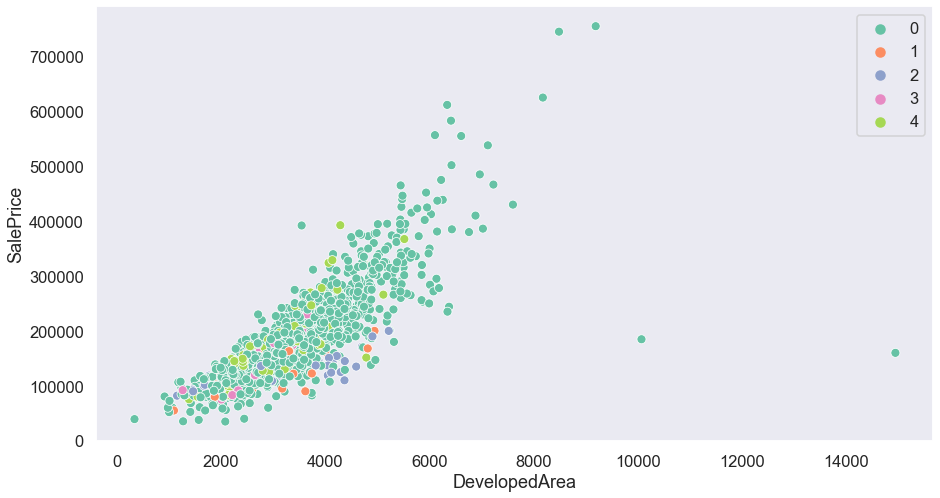

In [150]:
sns.set_context('talk', font_scale=1) 
sns.set_style('dark')
plt.figure(figsize=(15,8))

# Plot total area that has been built out (nothing has been built on it) vs sale price of house
# considering the building type
sns.scatterplot(x='DevelopedArea', y='SalePrice', hue=train_df.BldgType.tolist(),
            palette='Set2', data=train_df[['SalePrice', 'DevelopedArea','BldgType']])
plt.show()

In [185]:
features = list(['SalePrice', 'SumQuality', 'SumMIQ', 'GarageAge', 'GarageAreaPerCar', 'IndoorArea', 'OutdoorArea',
                 'DevelopedArea', 'InsideOutsideRatio', 'FloorRatio', ])
corr = train_df[features].corr()['SalePrice']
print(corr)

SalePrice             1.000000
SumQuality            0.737538
SumMIQ                0.753830
GarageAge            -0.261441
GarageAreaPerCar     -0.013972
IndoorArea            0.807518
OutdoorArea           0.569425
DevelopedArea         0.816964
InsideOutsideRatio   -0.078553
FloorRatio            0.148011
Name: SalePrice, dtype: float64


In [ ]:
################## DISREGARD LOGIC BELOW ######################

In [ ]:
# encode object columns
# enc_df = train_df.select_dtypes(include=['object']).apply(LabelEncoder().fit_transform)
# enc_df

In [ ]:
# add encoded columns back into train df
# train_df[enc_df.columns] = enc_df
# train_df

In [ ]:
# normalize df except for price column
# norm_df = (train_df - train_df.mean()) / (train_df.max() - train_df.min())